* Jeremy Beard

* Due 20220403

* Week 4

* MSDS650

* Genie Hays

<img align="right" style="padding-right:10px;" src="figures_wk4/guinea_pig.png" width=300><br>
# Week 4 Lab - Hypothesis Testing

 This week's assignment will give you some practice defining and testing a hypothesis.

## Our Dataset: 
**Dataset Name::** ToothGrowth.csv (locted in the assign_wk4 folder)<br>
The tooth growth dataset describes the length of the odontoblasts (teeth) in each of 10 guinea pigs at three Vitamin C dosage levels (0.5, 1, and 2 mg) with two delivery methods (orange juice or ascorbic acid).

The file contains 60 observations of 3 variables <br>
len : Tooth length <br>
supp : Supplement type (VC or OJ)<br>
dose : Dose in milligrams<br>


# Assignment Requirements

Hypothesis testing for the given dataset. Your analysis should include the following:
   1. Graphically describe the dataset
      - This could include box plots, histograms, etc.
      - Provide a summary of your initial findings about the dataset.
   2. Check of data normality, using both methods
      - Graphically  check for normality
      - Statistical test for normality
   3. Defined a null and alternative hypothesis (Ho and Ha) for the dataset
      - Be specific and clear in your definitions
   4. Hypothesis testing 
      - Explain why you chose the test(s) you are using
      - Summarize your findings from the test(s) you performed
   5. Conclusion based on your analysis
      - Be sure to defend your conclusion. Include supporting information for your analysis.
   6. Refine your initial hypothesis and repeat steps 3 through 5
      - How did the outcome(s) change between your original Ho/Ha and your refined Ho/Ha?

**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

# Deliverables:
Upload your Jupyter Notebook to the corresponding location in WorldClass. 

**Note::** Make sure you have clearly indicated each assignment requirement within your notebook.

# I. Introduction


In the cells below, a dataset of tooth growth was analyzed. Mostly the relationship between the dosage of Vitamin C in milligrams, and the tooth length of the guinea pigs were focused on. First, the dataset was graphically analyzed and some metadata was calculated. Then the data was tested to see if it followed a normal distribution. Finally, two separate tests were conducted to verify or reject certain hypotheses. A first test was conducted and then this test was revised to create the second test. Thank you guinea pigs for your contribution to data science!

# II. Methods, III. Code, and IV. Analysis of Results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('assign_wk4/ToothGrowth.csv')

### 1. Graphically describe the dataset
* This could include box plots, histograms, etc.
* Provide a summary of your initial findings about the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  60 non-null     int64  
 1   len         60 non-null     float64
 2   supp        60 non-null     object 
 3   dose        60 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.0+ KB


In [4]:
df.shape

(60, 4)

In [5]:
df.head(10)

,Unnamed: 0,len,supp,dose
0,1,4.2,VC,0.5
1,2,11.5,VC,0.5
2,3,7.3,VC,0.5
3,4,5.8,VC,0.5
4,5,6.4,VC,0.5
5,6,10.0,VC,0.5
6,7,11.2,VC,0.5
7,8,11.2,VC,0.5
8,9,5.2,VC,0.5
9,10,7.0,VC,0.5


In [6]:
df

,Unnamed: 0,len,supp,dose
0,1,4.2,VC,0.5
1,2,11.5,VC,0.5
2,3,7.3,VC,0.5
3,4,5.8,VC,0.5
4,5,6.4,VC,0.5
5,6,10.0,VC,0.5
6,7,11.2,VC,0.5
7,8,11.2,VC,0.5
8,9,5.2,VC,0.5
9,10,7.0,VC,0.5


<AxesSubplot:>

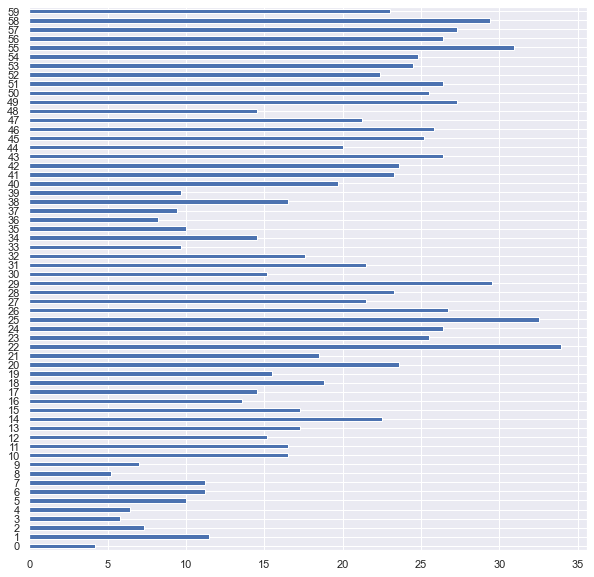

In [7]:
df['len'].plot.barh(figsize=(10,10))

<AxesSubplot:>

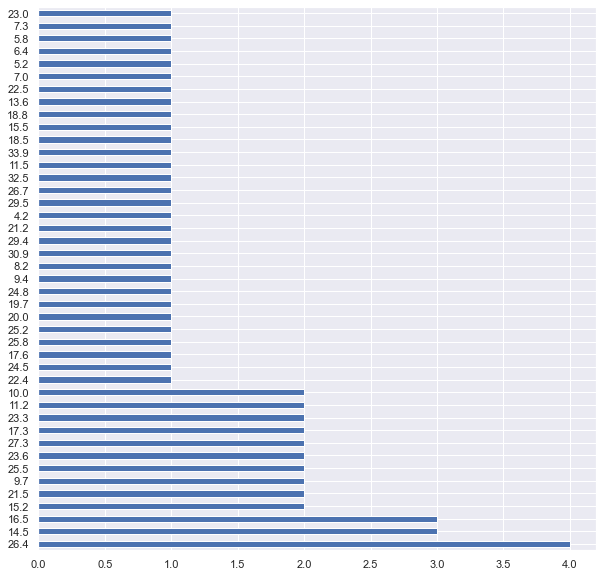

In [8]:
df['len'].value_counts().plot.barh(figsize=(10,10))

<AxesSubplot:>

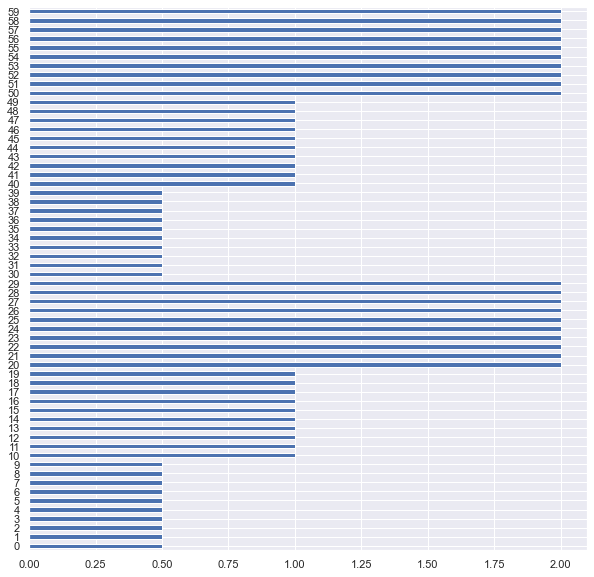

In [9]:
df['dose'].plot.barh(figsize=(10,10))

<AxesSubplot:>

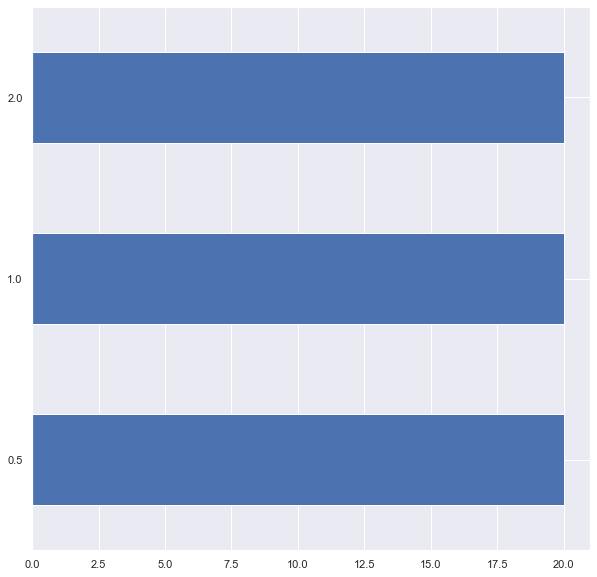

In [10]:
df['dose'].value_counts().plot.barh(figsize=(10,10))

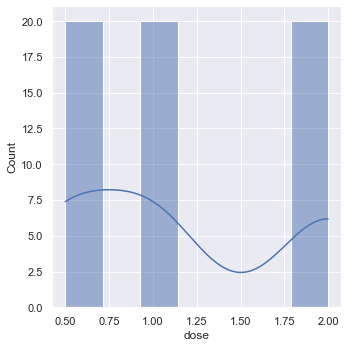

In [11]:
sns.displot(df['dose'], kde=True)

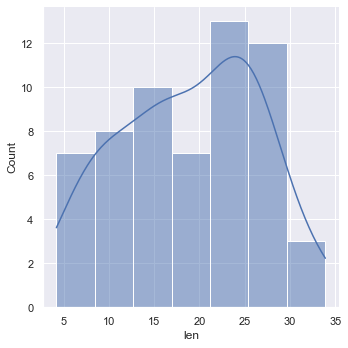

In [12]:
sns.displot(df['len'], kde=True)

<AxesSubplot:>

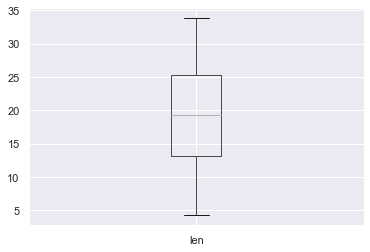

In [13]:
df.boxplot('len')

<AxesSubplot:>

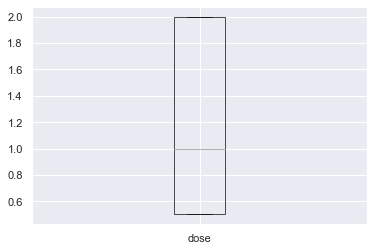

In [14]:
df.boxplot('dose')

In [15]:
df = pd.get_dummies(df, columns = ['supp'])
df

,Unnamed: 0,len,dose,supp_OJ,supp_VC
0,1,4.2,0.5,0,1
1,2,11.5,0.5,0,1
2,3,7.3,0.5,0,1
3,4,5.8,0.5,0,1
4,5,6.4,0.5,0,1
5,6,10.0,0.5,0,1
6,7,11.2,0.5,0,1
7,8,11.2,0.5,0,1
8,9,5.2,0.5,0,1
9,10,7.0,0.5,0,1


In [16]:
df.describe()

,Unnamed: 0,len,dose,supp_OJ,supp_VC
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,30.500000,18.813333,1.166667,0.500000,0.500000
std,17.464249,7.649315,0.628872,0.504219,0.504219
min,1.000000,4.200000,0.500000,0.000000,0.000000
25%,15.750000,13.075000,0.500000,0.000000,0.000000
50%,30.500000,19.250000,1.000000,0.500000,0.500000
75%,45.250000,25.275000,2.000000,1.000000,1.000000
max,60.000000,33.900000,2.000000,1.000000,1.000000


* Provide a summary of your initial findings about the dataset.

The dataset seems to have 3 (or 4) features. An ID, a tooth length, a dosage, and a delivery method. With regard to the delivery method feature, half were via orange juice and half were via ascorbic acid. With regard to the dosage feature, values were either 0.5, 1.0, or 2.0. The tooth length feature had a variety of values. 

With regard to the tooth length feature, the mean length was 18.8, and the standard deviation was 7.65. The minimum length was 4.2 and the maximum length was 33.9. A unit was not provided for the tooth length. 

### 2. Check of data normality, using both methods
* Graphically check for normality
* Statistical test for normality

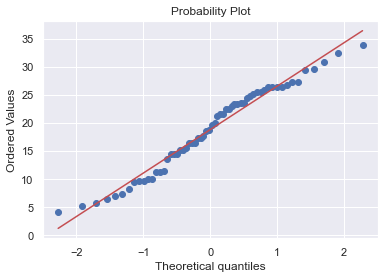

In [17]:
import scipy.stats as stats
res = stats.probplot(df['len'], plot=plt)

In [18]:
from scipy.stats import normaltest

stat, p = normaltest(df['len'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks normally distributed.')
else:
    print('Sample does NOT look normally distributed.')

Statistics=6.490, p=0.039
Sample does NOT look normally distributed.


In [19]:
from scipy.stats import shapiro

stats, p = shapiro(df['len'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks normally distrbuted.')
else:
    print('Sample does not look normally distributed.')

Statistics=6.490, p=0.109
Sample looks normally distrbuted.


The findings from the normality tests were inconclusive. The D'Agostino's K^2 Test found that the data does NOT look normally distributed, while the Shapiro-Wilk Test found that the data DOES look normally distributed. The graphical analysis using the probplot function seemed to show the data was mostly normally distributed, so it can be stated that the data looks normally distributed overall. This is not a straightforward assumption however.

### 3. Defined a null and alternative hypothesis (Ho and Ha) for the dataset
* Be specific and clear in your definitions

The following hypotheses were chosen for the first test:

Null Hypothesis Ho: The mean of the dose=1.0 datapoints is not significantly different from the mean of the dose=2.0 datapoints

Alternative Hypothesis Ha: The mean of the dose=1.0 datapoints IS significantly different from the mean of the dose=2.0 datapoints

### 4. Hypothesis testing
* Explain why you chose the test(s) you are using
* Summarize your findings from the test(s) you performed

For each test (the original test and the revised test) a t-test was chosen because it is ideal for comparing means. Both of the tests involved comparing means so using a t-test was a clear choice.

The findings from the test(s) will be summarized in the conclusion section, section V. However, descriptions of the methods and the conclusions gleaned along the way are stated in the individual cells as well.

In [20]:
#Collect your data
# first i will get the subsets of the dataset corresponding to the different dosages
df_1_0 = df.loc[df['dose'] == 1.0]
df_1_0

,Unnamed: 0,len,dose,supp_OJ,supp_VC
10,11,16.5,1.0,0,1
11,12,16.5,1.0,0,1
12,13,15.2,1.0,0,1
13,14,17.3,1.0,0,1
14,15,22.5,1.0,0,1
15,16,17.3,1.0,0,1
16,17,13.6,1.0,0,1
17,18,14.5,1.0,0,1
18,19,18.8,1.0,0,1
19,20,15.5,1.0,0,1


In [21]:
#Collect your data
# first i will get the subsets of the dataset corresponding to the different dosages
df_0_5 = df.loc[df['dose'] == 0.5]
df_0_5


,Unnamed: 0,len,dose,supp_OJ,supp_VC
0,1,4.2,0.5,0,1
1,2,11.5,0.5,0,1
2,3,7.3,0.5,0,1
3,4,5.8,0.5,0,1
4,5,6.4,0.5,0,1
5,6,10.0,0.5,0,1
6,7,11.2,0.5,0,1
7,8,11.2,0.5,0,1
8,9,5.2,0.5,0,1
9,10,7.0,0.5,0,1


In [22]:
#Collect your data
# first i will get the subsets of the dataset corresponding to the different dosages
df_2_0 = df.loc[df['dose'] == 2.0]
df_2_0

,Unnamed: 0,len,dose,supp_OJ,supp_VC
20,21,23.6,2.0,0,1
21,22,18.5,2.0,0,1
22,23,33.9,2.0,0,1
23,24,25.5,2.0,0,1
24,25,26.4,2.0,0,1
25,26,32.5,2.0,0,1
26,27,26.7,2.0,0,1
27,28,21.5,2.0,0,1
28,29,23.3,2.0,0,1
29,30,29.5,2.0,0,1


In [23]:
# Next, i want to get the means of each of the 3 data subsets
df_1_0_mean = df_1_0['len'].mean()
df_1_0.describe()

,Unnamed: 0,len,dose,supp_OJ,supp_VC
count,20.000000,20.000000,20.0,20.000000,20.000000
mean,30.500000,19.735000,1.0,0.500000,0.500000
std,15.669279,4.415436,0.0,0.512989,0.512989
min,11.000000,13.600000,1.0,0.000000,0.000000
25%,15.750000,16.250000,1.0,0.000000,0.000000
50%,30.500000,19.250000,1.0,0.500000,0.500000
75%,45.250000,23.375000,1.0,1.000000,1.000000
max,50.000000,27.300000,1.0,1.000000,1.000000


In [24]:
# Next, i want to get the means of each of the 3 data subsets
df_0_5_mean = df_0_5['len'].mean()
df_0_5.describe()
#df_0_5_mean

,Unnamed: 0,len,dose,supp_OJ,supp_VC
count,20.000000,20.000000,20.0,20.000000,20.000000
mean,20.500000,10.605000,0.5,0.500000,0.500000
std,15.669279,4.499763,0.0,0.512989,0.512989
min,1.000000,4.200000,0.5,0.000000,0.000000
25%,5.750000,7.225000,0.5,0.000000,0.000000
50%,20.500000,9.850000,0.5,0.500000,0.500000
75%,35.250000,12.250000,0.5,1.000000,1.000000
max,40.000000,21.500000,0.5,1.000000,1.000000


In [25]:
# Next, i want to get the means of each of the 3 data subsets
df_2_0_mean = df_2_0['len'].mean()
df_2_0.describe()

,Unnamed: 0,len,dose,supp_OJ,supp_VC
count,20.000000,20.00000,20.0,20.000000,20.000000
mean,40.500000,26.10000,2.0,0.500000,0.500000
std,15.669279,3.77415,0.0,0.512989,0.512989
min,21.000000,18.50000,2.0,0.000000,0.000000
25%,25.750000,23.52500,2.0,0.000000,0.000000
50%,40.500000,25.95000,2.0,0.500000,0.500000
75%,55.250000,27.82500,2.0,1.000000,1.000000
max,60.000000,33.90000,2.0,1.000000,1.000000


In [26]:
print(f'Dosage: 0.5\nMean: {df_0_5_mean}\n\nDosage: 1.0\nMean: {df_1_0_mean}\n\nDosage: 2.0\nMean: {df_2_0_mean}')

Dosage: 0.5
Mean: 10.604999999999999

Dosage: 1.0
Mean: 19.735000000000003

Dosage: 2.0
Mean: 26.1


In [27]:
# so now we have our means
# Reminder: our hypotheses are:
# Null: mean of dose=1.0 datapoints is not significantly different from mean of dose=2.0 datapoints
# Alternate: they are significantly different

# at first glance, they definitely seem to be significantly different.
from scipy.stats import ttest_1samp

alpha = 0.05
# Let's create lists for the ttest command
dose_1_0_lens = df_1_0['len'].tolist()
dose_0_5_lens = df_0_5['len'].tolist()
dose_2_0_lens = df_2_0['len'].tolist()

print(f'We are testing Ho = mean of 2.0 dosage = 26.1, testing that our dataset of dose=1.0 has a mean which is not significantly different than that of the dose=2.0 subset')
#dose_1_0_lens

We are testing Ho = mean of 2.0 dosage = 26.1, testing that our dataset of dose=1.0 has a mean which is not significantly different than that of the dose=2.0 subset


In [28]:
tset1, pval1 = ttest_1samp(dose_1_0_lens, df_2_0_mean)
print(f'p-value: {pval1}')

# eval p-value
if pval1 < alpha:    # alpha value is 0.05 or 5%
   print('Reject null hypothesis')
else:
  print('Accept null hypothesis')

p-value: 3.5232485732861514e-06
Reject null hypothesis


### 5. Conclusion based on your analysis
* Be sure to defend your conclusion. Include supporting information for your analysis.

The result of our one-sample T-test was that the null hypthesis can be rejected. This indicates that the means of the 1.0 dosage dataset and the 2.0 dosage dataset are significantly different. This conclusion was also evident at first glance because the two means were indeed drastically different from each other (26.1 and 10.6).

### 6. Refine your initial hypothesis and repeat steps 3 through 5
* How did the outcome(s) change between your original Ho/Ha and your refined Ho/Ha?

The following hypotheses were chosen for the second (revised) test:

Null Hypothesis Ho: The mean of the dose=2.0 datapoints is not significantly different from the estimated (projected) mean of the dose=2.0 datapoints

Alternative Hypothesis Ha: The mean of the dose=2.0 datapoints IS significantly different from the estimated (projected) mean of the dose=2.0 datapoints

In [29]:
# Next, I want to test the data subset of the 2.0 dosages 
# I noticed that the mean lengths increased as the dosages increased. 
# So, I will use the linear slope of the 0.5 and 1.0 dosages to project what the 2.0 mean *could* be
# I will use point-slope form, (y-y1)=m(x-x1)+b
# m = (y2-y1)/(x2-x1)
# p1 = (x1, y1) = (dosage, mean) = 0.5, 10.6
# p2 = (x2, y2) = (dosage, mean) = 1.0, 19.7
p1 = [0.5, df_0_5_mean]
p2 = [1.0, df_1_0_mean]
m = (p2[1] - p1[1])/(p2[0] - p1[0])

# I will solve the point slope equation for b, our last unknown
# b = (y-y1) - m(x-x1)
# To find b, we will set x to 0, and y=b
#y=mx+b, b=y-mx
b = p1[1] - m*p1[0]

# now we can find the estimated 2.0 mean, all unknowns are known
# y = m(x-x1)+b+y1
df_2_0_mean_estimate = m*(2.0 - p1[0]) + b + p1[1]
df_2_0_mean_estimate

39.470000000000006

In [30]:
print(f'We will test if the real mean of the 2.0 dosage dataset is significantly different than this projected mean of {df_2_0_mean_estimate}')

We will test if the real mean of the 2.0 dosage dataset is significantly different than this projected mean of 39.470000000000006


In [31]:
tset2, pval2 = ttest_1samp(dose_2_0_lens, df_2_0_mean_estimate)
print(f'p-value: {pval2}')

# eval p-value
if pval2 < alpha:    # alpha value is 0.05 or 5%
   print('Reject null hypothesis')
else:
  print('Accept null hypothesis')

p-value: 2.0966114743926494e-12
Reject null hypothesis


The result of our revised one-sample T-test was that the null hypothesis can again be rejected. This indicates that the mean of the 2.0 dosage dataset and the projected mean (using the 0.5 and 1.0 dosage means to estimate) are significantly different. This conclusion was also evident at first glance because the two means were again drastically different from each other.

# V. Conclusion

Both tests of the two similar-but-different null hypotheses found that in each case, the null hypothesis could be rejected.

For each test, a t-test was chosen because it is ideal for comparing means. Both of the tests involved comparing means so using a t-test was a clear choice.

The first test was testing if the mean of the 1.0 dosage dataset was significantly different than the mean of the 2.0 dosage dataset. Using an alpha of 0.05, it was found that the two means are indeed significantly different. This aligns with the empirical view of the means as they were 26.1 and 10.6, drastically different.

The second test used a projected (estimated) mean for the 2.0 dosage dataset and tested if the estimated and actual mean for the 2.0 dosage dataset were significantly different. The actual mean was 26.1 and the estimated mean was 39.5. This test found that the two means are indeed significantly different. This confirmed observations of the means as they appeared to be significantly different at first glance.

# VI. References

1) Team, T. A. (2022, March 1). Point-Slope Form: Explanation, Review, and Examples. Albert Resources. Retrieved April 3, 2022, from https://www.albert.io/blog/point-slope-form/

2) Class dataset provided for this assignment: ToothGrowth.csv

3) From the Experts PDF: Week 4

4) Week 4 Assignment Lab (Jupyter notebook)